### Task 1 - User Overview Analysis

In [27]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np

Extract and Load the xDR Dataset

In [28]:
import os
import sys

# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join("..", "scripts")))

**Load the data from PostgreSQL**

In [29]:
# import load_data from scripts module
from db_conn import load_data

xdr_df = load_data()

✅ Database Connected Successfully!


Explore the First Ten Row

In [30]:
# Explre the first ten rows
xdr_df.head(10)

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0
5,1.311448e+19,4/12/2019 21:37,439.0,4/25/2019 8:08,553.0,1074638.0,2.082014e+14,3.366819e+10,3.529841e+13,T89132C,...,21332918.0,2611113.0,7345361.0,6536448.0,710293538.0,13167974.0,654978277.0,4436057.0,30307754.0,754452212.0
6,1.311448e+19,4/13/2019 8:41,612.0,4/25/2019 8:16,168.0,1035261.0,2.082014e+14,3.366537e+10,8.676270e+13,9.16456701058919E+015,...,7234465.0,1886295.0,13231006.0,17981760.0,44796223.0,14084934.0,803653557.0,10649768.0,47925246.0,70562047.0
7,1.304243e+19,4/14/2019 2:11,592.0,4/25/2019 2:26,512.0,951292.0,2.082010e+14,3.376349e+10,8.654640e+13,CELL_208_20_520025_1,...,12189786.0,19735183.0,6858496.0,12075206.0,748906189.0,16149622.0,537601820.0,7714657.0,58813016.0,775350343.0
8,1.311448e+19,4/14/2019 12:48,121.0,4/25/2019 10:22,960.0,941634.0,2.082014e+14,3.369874e+10,3.556241e+13,T42084A,...,18436641.0,10860867.0,10587264.0,8467177.0,821671285.0,6548349.0,172920486.0,14749031.0,42363146.0,861612261.0
9,1.304243e+19,4/15/2019 0:32,0.0,4/25/2019 0:40,284.0,864482.0,2.082003e+14,3.365922e+10,3.557311e+13,L20434C,...,16338345.0,6573194.0,12211149.0,974201.0,811355188.0,1591237.0,64856042.0,12815208.0,22417975.0,850570347.0


Checking the Size of the Data

In [31]:
# Check the size of the data
xdr_df.shape

(150001, 55)

**Select** and **Print** the names of columns with object data types (typically text or mixed types)

In [32]:
object_columns = xdr_df.select_dtypes(include='object').columns
print(object_columns)

Index(['Start', 'End', 'Last Location Name', 'Handset Manufacturer',
       'Handset Type'],
      dtype='object')


Check Missing Datas

In [33]:
# check missing data
missing_values = xdr_df.isnull().sum()

# Print columns with missing values only
missing_columns = missing_values[missing_values > 0]
print(missing_columns.reset_index())

                                       index       0
0                                  Bearer Id     991
1                                      Start       1
2                                   Start ms       1
3                                        End       1
4                                     End ms       1
5                                  Dur. (ms)       1
6                                       IMSI     570
7                              MSISDN/Number    1066
8                                       IMEI     572
9                         Last Location Name    1153
10                           Avg RTT DL (ms)   27829
11                           Avg RTT UL (ms)   27812
12                   Avg Bearer TP DL (kbps)       1
13                   Avg Bearer TP UL (kbps)       1
14               TCP DL Retrans. Vol (Bytes)   88146
15               TCP UL Retrans. Vol (Bytes)   96649
16                       DL TP < 50 Kbps (%)     754
17            50 Kbps < DL TP < 250 Kbps (%)  

**Handling Missing Values**

1. Key Identifiers:
    
    + The columns `Bearer Id`, `IMSI`, `MSISDN/Number`, and `IMEI` are very important. If information is missing in these columns, it means we could lose important details about users.
    
    + To keep our data accurate, I might remove any rows (data entries) that have missing values in these key columns.

2. Average Round Trip Time (RTT DL/UL):
    
    + RTT measures how well the network is performing. If there are a lot of missing values in this data, I can fill them in with the average (mean) or the middle value (median) of the existing values in that column. This helps keep the data usable.
    
3. Throughput Metrics:

    + The columns for Download Throughput (DL TP) and Upload Throughput (UL TP) also contain performance data. Just like with RTT, if there are missing values, I can replace them with the average or median values to maintain the integrity of the data.

**Summary**:

Overall, the goal is to ensure that our dataset remains useful and accurate by either removing critical missing data or filling in less critical gaps with average values.

In [34]:
# Drop rows with missing IMSI, MSISDN/Number, IMEI, and Last Location Name (as they are key identifiers)
df_cleaned = xdr_df.dropna(
    subset=["Bearer Id", "IMSI", "MSISDN/Number", "IMEI", "Last Location Name"]
)

# List of throughput-related columns that may contain NaN values
throughput_columns = [
    "Avg RTT DL (ms)",
    "Avg RTT UL (ms)",
    "TCP DL Retrans. Vol (Bytes)",
    "TCP UL Retrans. Vol (Bytes)",
    "DL TP < 50 Kbps (%)",
    "50 Kbps < DL TP < 250 Kbps (%)",
    "250 Kbps < DL TP < 1 Mbps (%)",
    "DL TP > 1 Mbps (%)",
    "UL TP < 10 Kbps (%)",
    "10 Kbps < UL TP < 50 Kbps (%)",
    "50 Kbps < UL TP < 300 Kbps (%)",
    "UL TP > 300 Kbps (%)",
]

# Filling NaN values with the mean for each column
df_cleaned.loc[:, throughput_columns] = df_cleaned[throughput_columns].fillna(
    df_cleaned[throughput_columns].mean()
)

print(
    "Data cleaning successful! Rows with missing key identifiers have been dropped, and NaN values in throughput-related columns have been filled with mean values."
)


Data cleaning successful! Rows with missing key identifiers have been dropped, and NaN values in throughput-related columns have been filled with mean values.


In [35]:
# Fill NaN values in 'Total UL (Bytes)' and 'Total DL (Bytes)' with 0
df_cleaned.loc[:, ["Total UL (Bytes)", "Total DL (Bytes)"]] = df_cleaned[
    ["Total UL (Bytes)", "Total DL (Bytes)"]
].fillna(0)

print(
    "Missing values in 'Total UL (Bytes)' and 'Total DL (Bytes)' have been filled with 0."
)

Missing values in 'Total UL (Bytes)' and 'Total DL (Bytes)' have been filled with 0.


In [36]:
# Check and drop duplicates
duplicate_count = df_cleaned.duplicated().sum()
print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 0


In [37]:
# Display the data types of each column in the cleaned DataFrame
print("Data types of each column in the cleaned DataFrame:")
print(df_cleaned.dtypes)

Data types of each column in the cleaned DataFrame:
Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < D

Handling outliers

In [38]:
import numpy as np

# Ensure were are working on a copy of the DataFrame to avoid setting issues
df_cleaned = df_cleaned.copy()

# Select only numeric columns (exclude location and date)
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns

# Clip outliers for the numeric columns
for column in numeric_columns:
    lower_bound = df_cleaned[column].quantile(0.05)
    upper_bound = df_cleaned[column].quantile(0.95)
    df_cleaned.loc[:, column] = df_cleaned[column].clip(lower=lower_bound, upper=upper_bound)

In [39]:
# Convert 'Start' column to datetime format
import pandas as pd
df_cleaned['Start'] = pd.to_datetime(df_cleaned['Start'], format='%m/%d/%Y %H:%M')

In [40]:
# Check data type of 'Start' column
print(df_cleaned['Start'].dtype)

datetime64[ns]


**Analysis Steps**

1. **Identify the Top 10 Handsets Used by Customers**: 
   Begin by analyzing the dataset to find the ten most frequently used handsets. This can be done by grouping the data by handset model and counting the occurrences.
   
2. **Identify the Top 3 Handset Manufacturers**:
   Next, determine which handset manufacturers are the most popular by aggregating the data to find the top three manufacturers based on the number of handsets used.
   
3. **Identify the Top 5 Handsets per Top 3 Handset Manufacturer**:
   For each of the top three manufacturers, identify their five most popular handset models. This involves filtering the data by manufacturer and ranking the handsets within each group.

In [41]:
data_folder = "../data"
os.makedirs(data_folder, exist_ok=True)
# Define the output file path
output_path = os.path.join(data_folder, "cleaned_data.csv")

# Save the cleaned DataFrame to the "Data" folder
df_cleaned.to_csv(output_path, index=False)

print(f"Cleaned DataFrame saved to '{output_path}'")

Cleaned DataFrame saved to '../data\cleaned_data.csv'


In [19]:
from handset_analysis import HandsetAnalysis

ha = HandsetAnalysis(df_cleaned)
# Get the top 10 handsets
top_10 = ha.top_handsets(top_n=10).reset_index()

# Print the top 10 handsets and their usage counts
print("Top 10 Handsets:")
print(top_10)   

Top 10 Handsets:
                   Handset Type  count
0              Huawei B528S-23A  19724
1       Apple iPhone 6S (A1688)   9391
2        Apple iPhone 6 (A1586)   8991
3                     undefined   8892
4        Apple iPhone 7 (A1778)   6274
5       Apple iPhone Se (A1723)   5165
6        Apple iPhone 8 (A1905)   4977
7       Apple iPhone Xr (A2105)   4555
8  Samsung Galaxy S8 (Sm-G950F)   4459
9        Apple iPhone X (A1901)   3805


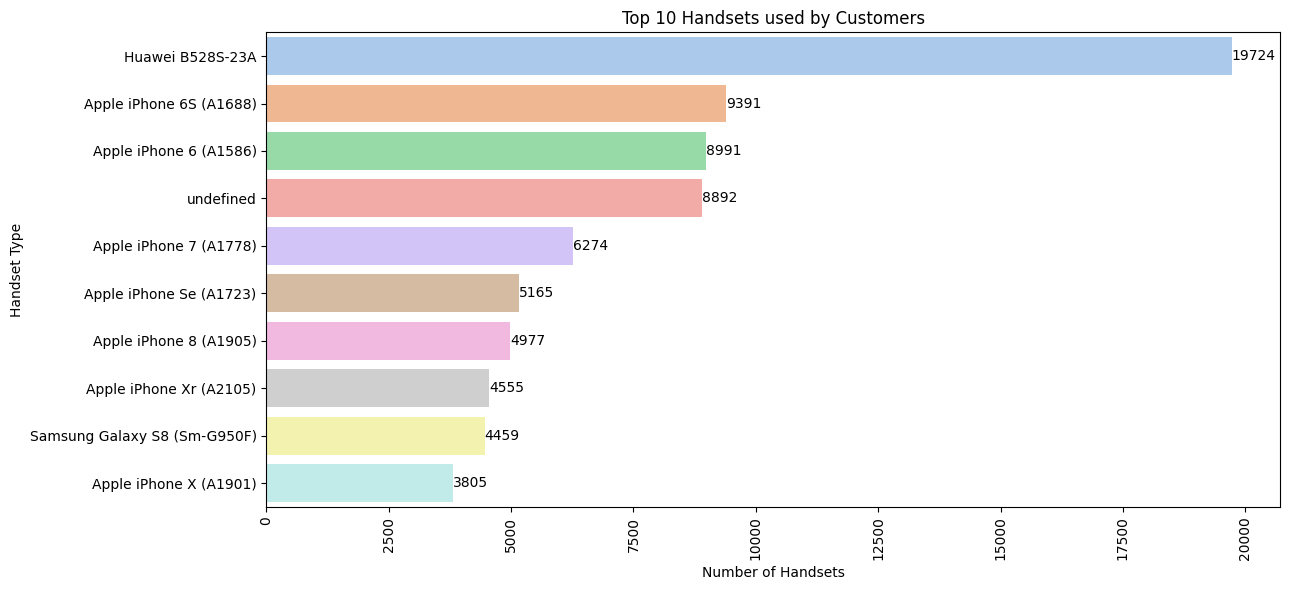

In [22]:
# Create a bar plot to visualize the top 10 handsets used by customers with custom colors
plt.figure(figsize=(13, 6))
barplot = sn.barplot(x='count', y='Handset Type', data=top_10, hue='Handset Type', palette='pastel')

# Add counts at the end of each bar for better readability
for index, value in enumerate(top_10['count']):
    barplot.text(value, index, f'{value}', va='center', ha='left', color='black')

# Rotate x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

plt.title('Top 10 Handsets used by Customers')  # Title of the plot
plt.ylabel('Handset Type')  # Label for the y-axis
plt.xlabel('Number of Handsets')  # Label for the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot

**Top 3 Manufacturers and their Counts**

In [26]:
# Top 3 manufacturers
print('Top 3 Manufacturers')
top_3_manufacturers = ha.top_manufacturers(top_n=3).reset_index(name='no_of_manufacturer')
top_3 = top_3_manufacturers.reset_index(drop=True)

# Display the top 3 manufacturers and their counts
top_3

Top 3 Manufacturers


,Handset Manufacturer,no_of_manufacturer
0,Apple,59304
1,Samsung,40393
2,Huawei,34269


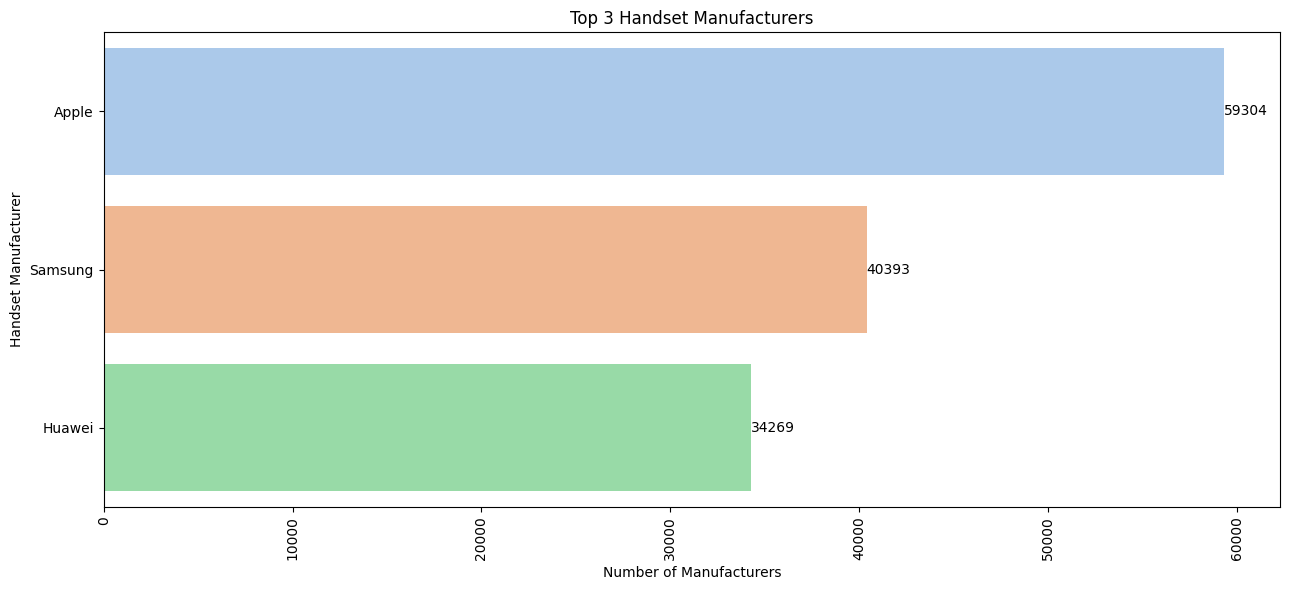

In [31]:
# Bar Plot of Top 3 Handset Manufacturers
plt.figure(figsize=(13, 6))  # Set the size of the figure
barplot = sn.barplot(x='no_of_manufacturer', y='Handset Manufacturer', data=top_3, hue='Handset Manufacturer', palette='pastel')

# Add counts at the end of each bar for better readability
for index, value in enumerate(top_3['no_of_manufacturer']):
    barplot.text(value, index, f'{value}', va='center', ha='left', color='black')  # Display the count value next to each bar

# Rotate x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

plt.title('Top 3 Handset Manufacturers')  # Title of the plot
plt.ylabel('Handset Manufacturer')  # Label for the y-axis
plt.xlabel('Number of Manufacturers')  # Label for the x-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()  # Display the plot

In [32]:
# Top 5 Handset Types per Top 3 Manufacturers
top_3_manufacturers = top_3_manufacturers['Handset Manufacturer'].tolist()  # Convert the top 3 manufacturers to a list
top_handsets_by_manufacturer = ha.top_handsets_per_manufacturer(
    top_3_manufacturers,
    top_n_handsets=5)  # Get the top 5 handsets for each of the top 3 manufacturers

# Print the top handsets by manufacturer for reference
print("Top 5 Handsets per Top 3 Manufacturers:")
for manufacturer, handsets in top_handsets_by_manufacturer.items():
    print(f"{manufacturer}:")
    print(handsets)

Top 5 Handsets per Top 3 Manufacturers:
Apple:
Handset Type
Apple iPhone 6S (A1688)    9391
Apple iPhone 6 (A1586)     8991
Apple iPhone 7 (A1778)     6274
Apple iPhone Se (A1723)    5165
Apple iPhone 8 (A1905)     4977
Name: count, dtype: int64
Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4459
Samsung Galaxy A5 Sm-A520F      3699
Samsung Galaxy J5 (Sm-J530)     3674
Samsung Galaxy J3 (Sm-J330)     3454
Samsung Galaxy S7 (Sm-G930X)    3169
Name: count, dtype: int64
Huawei:
Handset Type
Huawei B528S-23A                  19724
Huawei E5180                       2073
Huawei P20 Lite Huawei Nova 3E     2011
Huawei P20                         1475
Huawei Y6 2018                      987
Name: count, dtype: int64


In [33]:
df_list = []

# Iterate through the dictionary
for manufacturer, series in top_handsets_by_manufacturer.items():
    # Convert each Series to a DataFrame
    df_temp = series.reset_index()
    df_temp.columns = ['Handset', 'Usage']
    df_temp['Manufacturer'] = manufacturer
    
    # Append to the list
    df_list.append(df_temp)
 # Concatenate all DataFrame parts into a single DataFrame
df = pd.concat(df_list, ignore_index=True)
df

,Handset,Usage,Manufacturer
0,Apple iPhone 6S (A1688),9391,Apple
1,Apple iPhone 6 (A1586),8991,Apple
2,Apple iPhone 7 (A1778),6274,Apple
3,Apple iPhone Se (A1723),5165,Apple
4,Apple iPhone 8 (A1905),4977,Apple
5,Samsung Galaxy S8 (Sm-G950F),4459,Samsung
6,Samsung Galaxy A5 Sm-A520F,3699,Samsung
7,Samsung Galaxy J5 (Sm-J530),3674,Samsung
8,Samsung Galaxy J3 (Sm-J330),3454,Samsung
9,Samsung Galaxy S7 (Sm-G930X),3169,Samsung


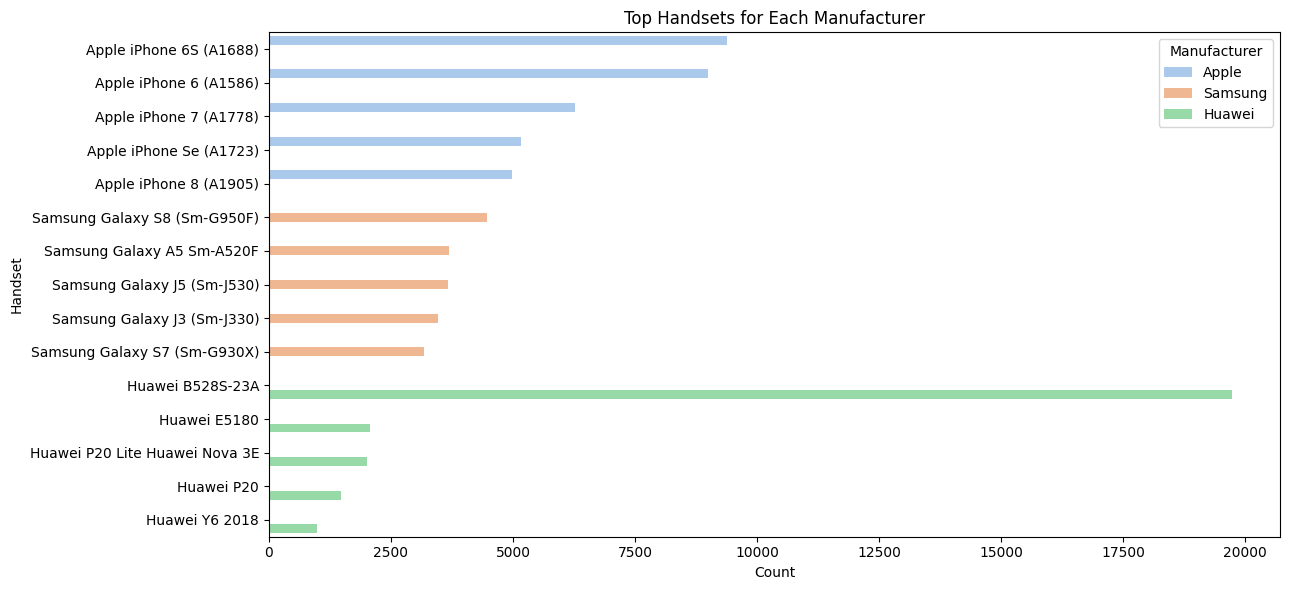

Summary of Handset Usage by Manufacturer:
   Manufacturer                       Handset  Usage
10       Huawei              Huawei B528S-23A  19724
0         Apple       Apple iPhone 6S (A1688)   9391
1         Apple        Apple iPhone 6 (A1586)   8991
2         Apple        Apple iPhone 7 (A1778)   6274
3         Apple       Apple iPhone Se (A1723)   5165
4         Apple        Apple iPhone 8 (A1905)   4977
5       Samsung  Samsung Galaxy S8 (Sm-G950F)   4459
6       Samsung    Samsung Galaxy A5 Sm-A520F   3699
7       Samsung   Samsung Galaxy J5 (Sm-J530)   3674
8       Samsung   Samsung Galaxy J3 (Sm-J330)   3454


In [39]:
# Set up the matplotlib figure with specified size
plt.figure(figsize=(13, 6))

# Create a nested bar chart using Seaborn to visualize handset usage by manufacturer
sn.barplot(
    x='Usage',  # X-axis represents the usage count
    y='Handset',  # Y-axis represents the handset types
    hue='Manufacturer',  # Different colors for each manufacturer
    data=df,  # Data source
    dodge=True,  # Separate bars for each manufacturer
    palette='pastel'  # Choose a pastel color palette for aesthetics
)

# Add titles and labels for better understanding
plt.title('Top Handsets for Each Manufacturer')  # Title of the chart
plt.xlabel('Count')  # Label for the x-axis
plt.ylabel('Handset')  # Label for the y-axis

# Add legend to differentiate manufacturers
plt.legend(title='Manufacturer')

# Adjust layout to prevent clipping of labels and ensure a neat appearance
plt.tight_layout()

# Show the plot to visualize the data
plt.show()  # Display the plot

# Print the summary of the data being plotted for reference
print("Summary of Handset Usage by Manufacturer:")
print(df[['Manufacturer', 'Handset', 'Usage']].sort_values(by='Usage', ascending=False).head(10))  # Display top 10 entries

**Interpretation and Recommendations**

   + **Interpretation**
  
        The analysis reveals that Huawei is the leading manufacturer, with its handset, Huawei B528S-23A, being the most favored among customers, boasting a usage count of 19,724. Following Huawei, Apple dominates with several popular models, including the iPhone 6S (A1688) and iPhone 6 (A1586), indicating strong brand loyalty. Samsung also maintains a significant presence with multiple models, such as the Galaxy S8 and Galaxy A5, showcasing a diverse consumer base. This data underscores the competitive landscape in the handset market, highlighting consumer preferences and trends.

   + **Recommendations to Marketing Teams**

        + **Targeted Marketing Campaigns**: Focus promotional efforts on the leading handsets from Huawei, Apple, and Samsung. Create campaigns that emphasize the unique features and benefits of these models, particularly the Huawei B528S-23A, which has the highest usage. Leverage social media and digital marketing to showcase customer testimonials and experiences with these handsets.
        + **Partnership Opportunities**: Explore collaborations with Huawei, Apple, and Samsung to enhance brand visibility. Joint promotions or exclusive bundles can attract consumers and create a competitive edge in the market. Consider co-hosting events or online webinars to engage directly with potential customers.
        + **Customer Feedback**: Regularly gather and analyze customer feedback on the top handsets. This can be done through surveys, focus groups, or social media interactions. Understanding customer experiences and preferences will allow for more tailored marketing strategies and product offerings, ultimately leading to improved customer satisfaction and loyalty.

##### Exploratory Analaysis

**Solution for Task-1.1 👇🏼**


In [49]:
from user_analysis import UserBehaviorAnalysis

# Create an instance of UserBehaviorAnalysis with the cleaned DataFrame
user_behavior_analysis = UserBehaviorAnalysis(df_cleaned)

# Aggregate user behavior data
user_behavior = user_behavior_analysis.aggregate_user_behavior()

# Print the aggregated user behavior data for reference
print("Aggregated User Behavior Data:")
print(user_behavior)

Aggregated User Behavior Data:
              num_sessions  total_duration      total_dl      total_ul  \
Bearer Id                                                                
7.277826e+18          7418    5.306130e+08  3.366540e+12  3.058524e+11   
7.277826e+18             1    6.887700e+04  4.817962e+08  5.707265e+07   
7.277826e+18             1    7.602100e+04  2.250455e+08  3.305897e+07   
7.277826e+18             1    8.014600e+04  7.624866e+08  2.244628e+07   
7.277826e+18             1    7.278300e+04  5.204721e+08  5.906656e+07   
...                    ...             ...           ...           ...   
1.311448e+19             1    1.170370e+05  3.236875e+08  3.977921e+07   
1.311448e+19             1    1.074450e+05  8.031791e+08  3.967894e+07   
1.311448e+19             1    1.304440e+05  3.491442e+08  4.527086e+07   
1.311448e+19             1    8.515700e+04  5.518549e+08  5.524453e+07   
1.311448e+19          7418    9.160225e+08  3.373146e+12  3.061010e+11   

      

In [50]:
# Descriptions of relevant columns
import pandas as pd
descriptions = {
    'Bearer Id': 'Session Id for each user',
    'Start': 'Session start time',
    'Dur. (ms)': 'Session duration (ms)',
    'Total UL (Bytes)': 'Total upload data (bytes)',
    'Total DL (Bytes)': 'Total download data (bytes)',
    'Social Media UL (Bytes)': 'Upload data for social media (bytes)',
    'Social Media DL (Bytes)': 'Download data for social media (bytes)',
    'Google UL (Bytes)': 'Upload data for Google apps (bytes)',
    'Google DL (Bytes)': 'Download data for Google apps (bytes)',
    'Email UL (Bytes)': 'Upload data for email (bytes)',
    'Email DL (Bytes)': 'Download data for email (bytes)',
    'Youtube UL (Bytes)': 'Upload data for YouTube (bytes)',
    'Youtube DL (Bytes)': 'Download data for YouTube (bytes)',
    'Netflix UL (Bytes)': 'Upload data for Netflix (bytes)',
    'Netflix DL (Bytes)': 'Download data for Netflix (bytes)',
    'Gaming UL (Bytes)': 'Upload data for gaming (bytes)',
    'Gaming DL (Bytes)': 'Download data for gaming (bytes)',
    'Other UL (Bytes)': 'Upload data for other apps (bytes)',
    'Other DL (Bytes)': 'Download data for other apps (bytes)'
}
# Convert the descriptions dictionary into a DataFrame
desc = pd.DataFrame(list(descriptions.items()), columns=['Variable', 'Description'])
dtypes = df_cleaned[desc['Variable']].dtypes.reset_index(name='data types')['data types']
desc['data type'] = dtypes
desc

,Variable,Description,data type
0,Bearer Id,Session Id for each user,float64
1,Start,Session start time,datetime64[ns]
2,Dur. (ms),Session duration (ms),float64
3,Total UL (Bytes),Total upload data (bytes),float64
4,Total DL (Bytes),Total download data (bytes),float64
5,Social Media UL (Bytes),Upload data for social media (bytes),float64
6,Social Media DL (Bytes),Download data for social media (bytes),float64
7,Google UL (Bytes),Upload data for Google apps (bytes),float64
8,Google DL (Bytes),Download data for Google apps (bytes),float64
9,Email UL (Bytes),Upload data for email (bytes),float64


### User Engagement Analysis

In [51]:
# Segment users into deciles based on behavior metrics and summarize the results
decile_summary = user_behavior_analysis.segment_users_by_decile()

# Print the summary of user segments by decile
print(decile_summary)

   Decile  total_data_volume  total_duration
0       5       5.811787e+12    1.092609e+09
1       6       6.130348e+12    1.493257e+09
2       7       6.481438e+12    1.861352e+09
3       8       8.025879e+12    2.200141e+09
4       9       1.590751e+13    4.614271e+09


**Key Insight**

The data indicates a clear trend where higher deciles correspond to increased total data volume and total session duration. Notably, decile 9 exhibits the highest total data volume at approximately **15.91 trillion bytes** and a session duration of about **4.61 billion seconds**. 

This suggests that users in higher deciles are significantly more engaged and consume more data, highlighting the importance of targeting these segments for enhanced service offerings and resource allocation.


**Analysis of the basic metrics**

To analyze the basic metrics like mean, median, standard deviation, and percentiles, we calculate these for key columns such as session duration and total data usage (upload + download).

**Quantitative Variables:**

`Dur. (ms)` (Session Duration in milliseconds): Measures the length of user sessions. This is a continuous variable that represents how long a session lasts.

`Total UL (Bytes)` (Total Upload Data): Represents the total amount of data uploaded by users in bytes. This is a continuous variable showing the volume of data uploaded.

`Total DL (Bytes)` (Total Download Data): Represents the total amount of data downloaded by users in bytes. This is also a continuous variable indicating the volume of data downloaded.

In [54]:
# Import the EDA module for exploratory data analysis
from eda_pipeline import EDA

# Create an instance of the EDA class with the cleaned DataFrame
eda = EDA(df_cleaned)

# Print a message indicating that the EDA instance has been successfully created
print("✅Exploratory Data Analysis instance created successfully.")

✅Exploratory Data Analysis instance created successfully.


In [55]:
# Define quantitative variables for basic statistics and dispersion metrics
quantitative_vars = ['Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)']

# Compute basic statistics and dispersion metrics for the specified quantitative variables
basic_metrics = eda.compute_basic_metrics(quantitative_vars)

# Print the computed basic metrics for review
print("Basic Statistics and Dispersion Metrics:")
print(basic_metrics)

Basic Statistics and Dispersion Metrics:
                       Dur. (ms)  Total UL (Bytes)  Total DL (Bytes)
Mean                1.001671e+05      4.111743e+07      4.547044e+08
Median              8.639900e+04      4.114375e+07      4.560177e+08
Mode                8.639900e+04      2.244628e+07      7.455622e+07
Standard Deviation  5.825719e+04      1.047466e+07      2.405564e+08
Variance            3.393900e+09      1.097185e+14      5.786738e+16
Range               2.217212e+05      3.729878e+07      7.597726e+08
IQR                 7.459175e+04      1.581575e+07      4.225929e+08


**Basic Metric Interpretation**

**Overview**

The basic statistics and dispersion metrics provide a detailed understanding of user behavior regarding session durations and data usage. Here’s a breakdown of key metrics and their importance.

**Key Metrics**

   1. **Mean** :
   
       + **Session Duration**: **100,167 ms (100.2 seconds)** indicates the average user session length.
       + **Total Upload**: **41 MB** on average per session.
       + **Total Download**: **454 MB** on average per session.

**Importance**

The mean serves as a benchmark for typical user behavior and data consumption, helping to assess normal usage patterns.

   2. **Median**:

       + **Session Duration**: **86,399 ms (86.4 seconds)** represents the middle value of user session durations.
       + **Total Upload**: **41 MB**.
       + **Total Downloads** : **456 MB**.

**Importance**   

The median provides a robust measure of central tendency, less influenced by outliers, thus representing typical session duration and data usage.

   3. **Mode**:

       + **Session Duration**: **86,399 ms (86.4 seconds)** is the most frequently occurring session length.
       + **Total Upload**: **22 MB**.
       + **Total Downloads** : **75 MB**. 
  
**Importance**   

The mode highlights the most common session duration and data sizes, aiding in identifying frequent user patterns.  

**Dispersion Metrics**

   1. **Standard Deviation**:
   
       + **Session Duration**: **58,257 ms** indicating substantial variability in session lengths.
       + **Total Upload**: **10.5 MB**, reflecting moderate variability in upload sizes.
       + **Total Downloads** : **240.6 MB**, indicating high variability in download sizes. 
  
**Importance**   

Standard deviation measures the extent of dispersion around the mean, providing insights into the consistency or variability in session durations and data usage.  

   2. **Variance**:

       + **Session Duration**:
       + **Total Upload**: **22 MB**.
       + **Total Downloads** : **75 MB**. 
  
**Importance**   

The mode highlights the most common session duration and data sizes, aiding in identifying frequent user patterns.  

   3. **Range**:

       + **Session Duration**: **221,721 ms**, indicating the spread between the shortest and longest sessions.
       + **Total Upload**: **37.3 MB**.
       + **Total Downloads** : **759.8 MB**. 
  
**Importance** 

The range highlights the variability within the data, illustrating the difference between minimum and maximum values.

   4. **Interquartile Range(IQR)**: 

       + **Session Duration**: **74,591 ms**, representing the spread within the middle 50% of session durations.   
       + **Total Upload**: **15.8 MB**.
       + **Total Downloads** : **422.6 MB**. 
  
**Importance**   

IQR provides insight into the dispersion of the central portion of the data, useful for identifying and addressing outliers or significant spreads.

**Importance for the Global Objective**
  
+ **User Segmentation**: These metrics facilitate the classification of users based on behavior, enabling targeted marketing and retention strategies.   
+ **Service Optimization** : Understanding typical and extreme data usage allows for the optimization of services to cater to both average and power users.
+ **Product Strategy**: Knowledge of mean and variability in user engagement aids in designing personalized offerings that align with user behavior. 

**Conclusion**

The combined insights from these metrics highlight diverse user engagement patterns, emphasizing the need for tailored strategies to enhance user experience and application performance. Understanding both average behaviors and variability equips stakeholders to make informed decisions in service and product development.

### Graphical Univariate Analysis

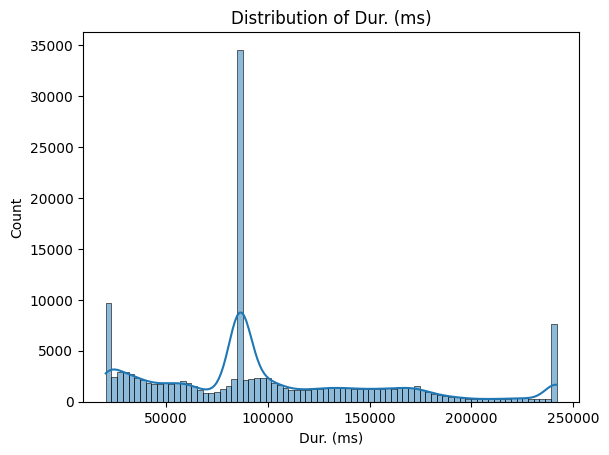

Histogram for Dur. (ms) plotted.


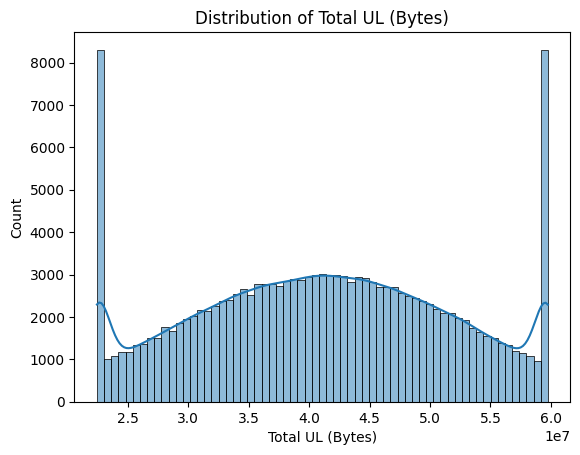

Histogram for Total UL (Bytes) plotted.


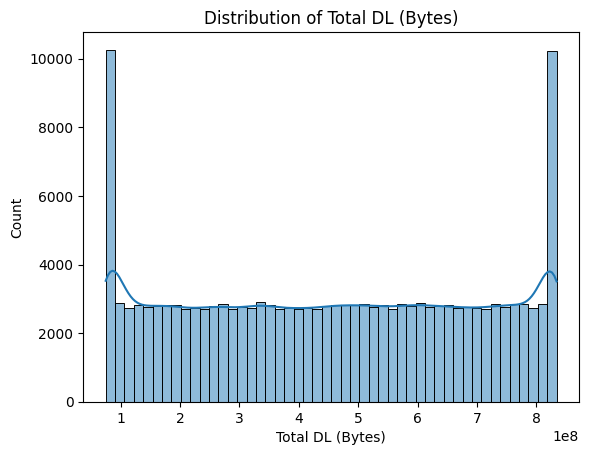

Histogram for Total DL (Bytes) plotted.


In [61]:
# Plot the distribution for each quantitative variable with histograms
for col in quantitative_vars:
    eda.plot_distribution(col)  # Plot histogram for the variable
    print(f"Histogram for {col} plotted.")

**Correlation Analysis**

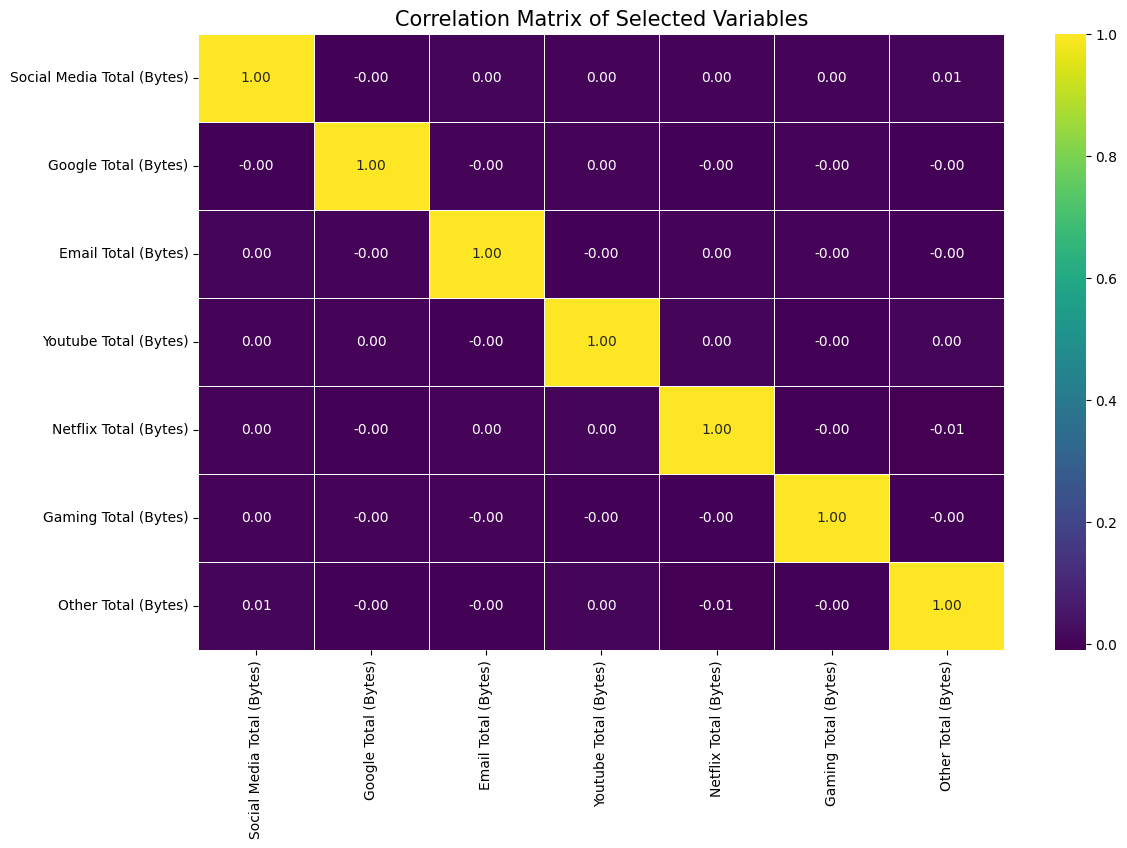

Correlation matrix heatmap plotted successfully.


In [64]:
# Import necessary libraries and functions
import matplotlib.pyplot as plt
import seaborn as sn

# Define the variables of interest for correlation analysis
variables = [
    'Social Media UL (Bytes)', 'Social Media DL (Bytes)',
    'Google UL (Bytes)', 'Google DL (Bytes)',
    'Email UL (Bytes)', 'Email DL (Bytes)',
    'Youtube UL (Bytes)', 'Youtube DL (Bytes)',
    'Netflix UL (Bytes)', 'Netflix DL (Bytes)',
    'Gaming UL (Bytes)', 'Gaming DL (Bytes)',
    'Other UL (Bytes)', 'Other DL (Bytes)'
]

# Compute the correlation matrix for the selected variables
correlation_matrix = eda.compute_correlation_matrix(variables)

# Set up the matplotlib figure
plt.figure(figsize=(13, 8))

# Plot the correlation matrix using seaborn's heatmap with a new color palette
sn.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

# Title for the plot
plt.title('Correlation Matrix of Selected Variables', fontsize=15)

# Show the plot
plt.show()

# Print statement to indicate the completion of the correlation matrix plot
print("Correlation matrix heatmap plotted successfully.")

PCA analysis

In [65]:
# Define the variables of interest for Principal Component Analysis (PCA)
variables = [
    'Social Media Total (Bytes)', 'Google Total (Bytes)',
    'Email Total (Bytes)', 'Youtube Total (Bytes)',
    'Netflix Total (Bytes)', 'Gaming Total (Bytes)',
    'Other Total (Bytes)'
]

# Perform PCA on the specified variables
pca_df, explained_var = eda.perform_pca(variables)

# Print the explained variance for each principal component
print("Explained variance for each principal component:", explained_var)

# Print statement to confirm PCA execution
print("PCA performed successfully on the selected variables.")

Explained variance for each principal component: [0.14427261 0.14388394]
PCA performed successfully on the selected variables.


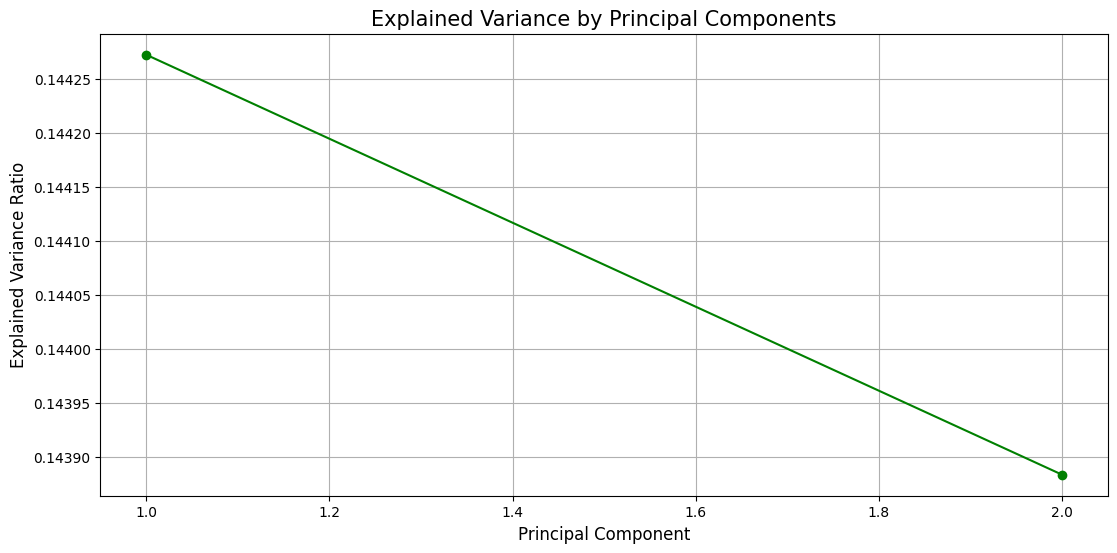

Explained variance plot displayed successfully.


In [67]:
# Create an array of component numbers for the x-axis
components = np.arange(1, len(explained_var) + 1)

# Plot the explained variance
plt.figure(figsize=(13, 6))
plt.plot(components, explained_var, marker='o', linestyle='-', color='green')  # Changed color to green

# Add labels and title
plt.title('Explained Variance by Principal Components', fontsize=15)
plt.xlabel('Principal Component', fontsize=12)
plt.ylabel('Explained Variance Ratio', fontsize=12)

# Show grid for better readability
plt.grid(True)

# Display the plot
plt.show()

# Print statement to confirm that the plot has been displayed
print("Explained variance plot displayed successfully.")